In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("dataset_buys _comp.csv")

In [3]:
data = df.copy()
label_encoders = {}

for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [4]:
X = data.drop("Buys_Computer", axis=1)
y = data["Buys_Computer"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.39      0.52        71
           1       0.74      0.93      0.82       129

    accuracy                           0.74       200
   macro avg       0.75      0.66      0.67       200
weighted avg       0.74      0.74      0.71       200



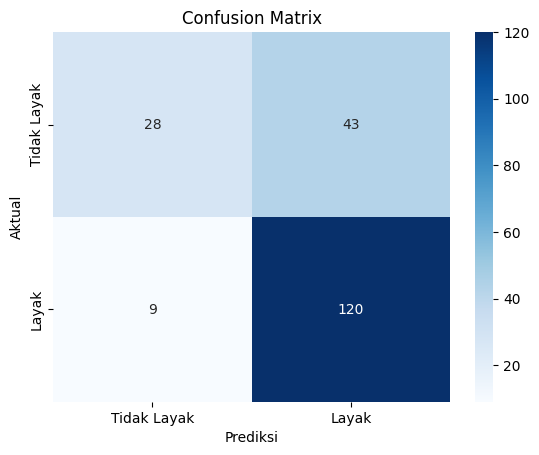

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Tidak Layak", "Layak"],
            yticklabels=["Tidak Layak", "Layak"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

Model klasifikasi untuk memprediksi kelayakan kredit komputer menggunakan Naive Bayes menghasilkan:

Akurasi:
74%

Model lebih cenderung menyatakan seseorang Layak untuk mendapatkan kredit komputer.

Recall untuk kelas "Layak": 93%
Dari semua orang yang layak, 93% berhasil dikenali dengan benar oleh model.

Recall untuk kelas "Tidak Layak": 39%
Model sering salah mengira orang yang tidak layak sebagai orang yang layak.